In [2]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(cowplot)
library(GGally)
library(ISLR)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────

In [3]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv"
pollution <- read_csv(url)
pollution <- na.omit(pollution)
# pollution[is.na(pollution)] <- 0
pollution <- mutate(pollution, HUMID = 100 - 5 * (TEMP - DEWP))
head(pollution)

Parsed with column specification:
cols(
  No = col_double(),
  year = col_double(),
  month = col_double(),
  day = col_double(),
  hour = col_double(),
  pm2.5 = col_double(),
  DEWP = col_double(),
  TEMP = col_double(),
  PRES = col_double(),
  cbwd = col_character(),
  Iws = col_double(),
  Is = col_double(),
  Ir = col_double()
)



No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,HUMID
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
25,2010,1,2,0,129,-16,-4,1020,SE,1.79,0,0,40
26,2010,1,2,1,148,-15,-4,1020,SE,2.68,0,0,45
27,2010,1,2,2,159,-11,-5,1021,SE,3.57,0,0,70
28,2010,1,2,3,181,-7,-5,1022,SE,5.36,1,0,90
29,2010,1,2,4,138,-7,-5,1022,SE,6.25,2,0,90
30,2010,1,2,5,109,-7,-6,1022,SE,7.14,3,0,95


In [4]:
set.seed(9999)

In [5]:
options(repr.matrix.max.rows = 12)
pollute_avg <- pollution %>%
     select(year, month, day, hour, pm2.5, DEWP, TEMP, PRES, Iws, Is, Ir, HUMID) %>%
     group_by(year,month) %>%
     summarise(pm2.5_avg = mean(pm2.5, na.rm = TRUE),TEMP_avg = mean(TEMP, na.rm = TRUE),Iws_avg = mean(Iws, na.rm = TRUE), HUMID_avg = mean(HUMID, na.rm = TRUE))
pollute_avg

pollution_vals <- pollution %>%
    select(pm2.5, DEWP, TEMP, PRES, Iws, Is, Ir, HUMID) %>%
    as_tibble()
pollution_vals

pollution_split <- initial_split(pollution_vals, prop = 3/4, strata = pm2.5)
pollution_training <- training(pollution_split)
pollution_testing <- testing(pollution_split)

`summarise()` regrouping output by 'year' (override with `.groups` argument)



year,month,pm2.5_avg,TEMP_avg,Iws_avg,HUMID_avg
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,1,90.44257,-6.364472,39.381133,47.94028
2010,2,97.23398,-1.918033,13.482191,43.81520
2010,3,94.10014,2.983075,24.122863,42.03103
2010,4,80.02925,10.805014,58.074666,29.51950
2010,5,86.89959,20.856174,21.602564,33.62280
2010,6,109.00354,24.458407,9.553717,59.45133
⋮,⋮,⋮,⋮,⋮,⋮
2014,7,89.45590,28.004071,18.363921,56.33650
2014,8,62.94270,25.750341,7.413847,60.67531


pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,HUMID
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
129,-16,-4,1020,1.79,0,0,40
148,-15,-4,1020,2.68,0,0,45
159,-11,-5,1021,3.57,0,0,70
181,-7,-5,1022,5.36,1,0,90
138,-7,-5,1022,6.25,2,0,90
109,-7,-6,1022,7.14,3,0,95
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
10,-22,-2,1033,226.16,0,0,0
8,-23,-2,1034,231.97,0,0,-5


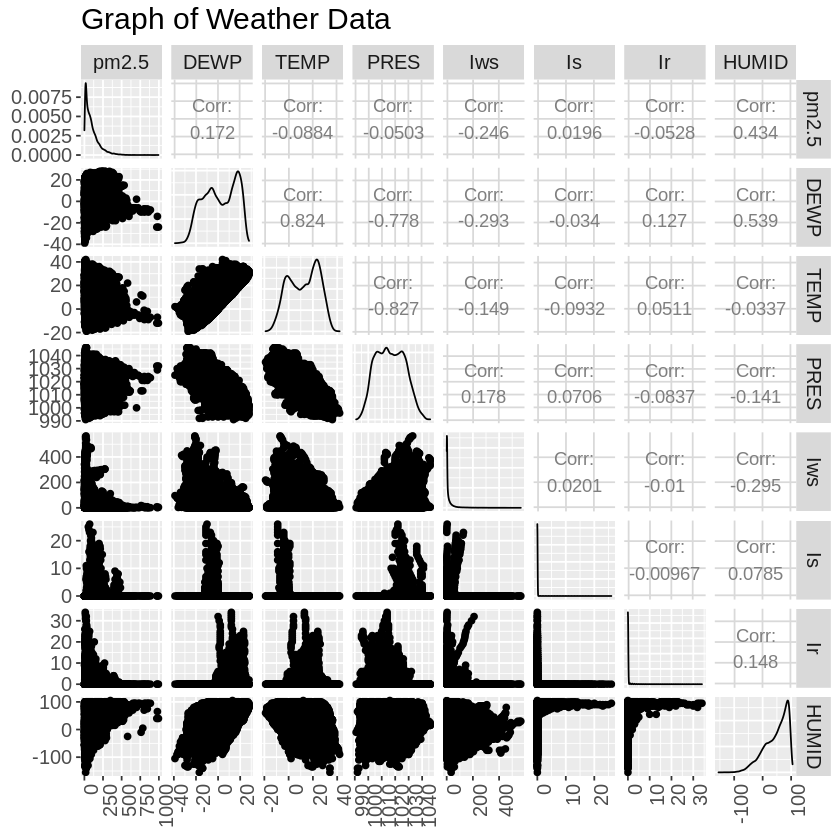

In [9]:
set.seed(9999)
ggpairs(data = pollution_training) +
    labs(title = "Graph of Weather Data") + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1), text = element_text(size = 15)) 

In [ ]:
pollution_sumtrain <- pollution_training %>%
    group_by(year, month) %>%
    summarise(meanpm2.5 = mean(pm2.5), meanTEMP = mean(TEMP), meanIws = mean(Iws), meanHUMID = mean(HUMID))
pollution_sumtrain

pollution_sumtrainyear <- pollution_training %>%
    group_by(year) %>%
    summarise(meanpm2.5 = mean(pm2.5), meanTEMP = mean(TEMP), meanIws = mean(Iws), meanHUMID = mean(HUMID))
pollution_sumtrainyear

pollution_sumtrainmonth <- pollution_training %>%
    group_by(month) %>%
    summarise(meanpm2.5 = mean(pm2.5), meanTEMP = mean(TEMP), meanIws = mean(Iws), meanHUMID = mean(HUMID))
pollution_sumtrainmonth